In [1]:
from LoadMNIST import load_mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
X_data, y_data = load_mnist(path='./data')

In [4]:
image_width = image_height = 28

def display(img):
    one_image = img.reshape(image_width, image_height)
    
#     plt.axis('off')
    plt.imshow(one_image, cmap=plt.cm.binary)


[[3 8 7]
 [9 9 0]
 [1 1 5]]


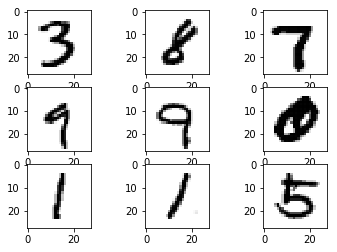

In [5]:
s = 10000
print(y_data[s:s+9].reshape(3,3))
for i in range(9):
    plt.subplot(3,3,i+1)
    display(X_data[s+i])
plt.show()

In [10]:
val_count = 5000
train_data = {
    'X_train': X_data[val_count:],
    'y_train': y_data[val_count:],
    'X_val': X_data[:val_count],
    'y_val': y_data[:val_count],
}
input_dim = train_data['X_train'].shape[1]

In [11]:
from fc_net import FullyConnectedNet
from solver import Solver

In [13]:
print("Lets overfit on small dataset")
model = FullyConnectedNet([100,100], input_dim, reg=1e-4, use_batchnorm=True)
solver = Solver(model, {
                    'X_train': X_data[:1000],
                    'y_train': y_data[:1000],
                    'X_val': X_data[1000:1500],
                    'y_val': y_data[1000:1500]},
                learning_rate=1e-1)

solver.train(max_iters=100)
pass

Lets overfit on small dataset
0, train_acc: 0.111000, val_acc : 0.114000
10, train_acc: 0.864000, val_acc : 0.772000
20, train_acc: 0.950000, val_acc : 0.816000
30, train_acc: 0.985000, val_acc : 0.836000
40, train_acc: 1.000000, val_acc : 0.856000
50, train_acc: 1.000000, val_acc : 0.862000
60, train_acc: 1.000000, val_acc : 0.862000
70, train_acc: 1.000000, val_acc : 0.860000
80, train_acc: 1.000000, val_acc : 0.860000
90, train_acc: 1.000000, val_acc : 0.856000


In [15]:

   
res = 0
iters = 0
while res < 0.97:
    iters += 1
    weight_scale = 10**(np.random.uniform(-3, 1))
    learning_rate = 10**(np.random.uniform(-5, -2))
    reg = 10**(np.random.uniform(-6,1))
    
    model = FullyConnectedNet([100,100,100], input_dim, reg=reg, use_batchnorm=True, weight_scale=weight_scale)
    solver = Solver(model, train_data, learning_rate=learning_rate)
    (train_acc, val_acc) = solver.train(max_iters=1000, silent=True)
    res = np.max(val_acc)
    print("%f, %f  scale: %f lr: %f reg:%f" % (train_acc[-1], val_acc[-1], weight_scale, learning_rate, reg))

0.864018, 0.871800  scale: 0.022912 lr: 0.001889 reg:0.000073
0.380727, 0.400400  scale: 2.372087 lr: 0.003171 reg:0.064496
0.120127, 0.121800  scale: 0.867344 lr: 0.000137 reg:0.001576
0.986782, 0.976000  scale: 0.002987 lr: 0.002183 reg:0.187595


In [ ]:

# 0.821600, 0.822600  scale: 8.230964 lr: 0.000016 reg:0.001120 batch false
# 0.959418, 0.958400  scale: 0.001241 lr: 0.007297 reg:0.000500 dropout 0.5
# 0.955982, 0.952600  scale: 0.002370 lr: 0.006523 reg:0.000003 dropout 0.5


In [16]:
X_test, y_test = load_mnist('testing', path='data')
test_acc = solver.check_accuracy(X_test, y_test)
print("Test data accuracy: %f " % test_acc)

Test data accuracy: 0.979000 


In [17]:
y_pred = model.predict(X_test)
mask = y_test != y_pred
X_err = X_test[mask]
y_err_pred = y_pred[mask]
y_err_act = y_test[mask]

errors:


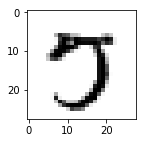

predict: 7, actual: 5


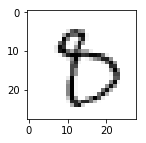

predict: 5, actual: 8


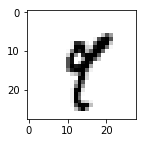

predict: 4, actual: 9


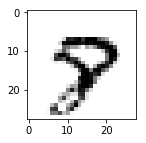

predict: 9, actual: 8


In [18]:
print("errors:")
for i in range(4):
    n = np.random.choice(y_err_pred.shape[0])
    plt.figure(figsize=(2,2))
    display(X_err[n])
    plt.show()
    print("predict: %d, actual: %d" % (y_err_pred[n], y_err_act[n]))

In [478]:
print(y_err_act.shape)
print(np.vstack([np.arange(10),np.bincount(y_err_act)]))

(209,)
[[ 0  1  2  3  4  5  6  7  8  9]
 [ 6 10 29 27 28 12 25 23 23 26]]


In [433]:
import pickle

In [434]:
with open('data.pkl', 'wb') as f:
    pickle.dump(model, f)

In [402]:
with open('data.pkl', 'rb') as f:
    model = pickle.load(f)